In [5]:
import tarfile
from six.moves import urllib


In [6]:
DOCUMENT_PATH = "/Users/ekalitsi/Cancer-Patient-Anaylysis"

In [7]:
import os
import pandas as pd


# calling data
def load_cancer_patient_data(cancer_patient= DOCUMENT_PATH):
    csv_path = os.path.join(cancer_patient,"cancer.csv")
    return pd.read_csv(csv_path)

df = load_cancer_patient_data()
display(df)


,Case_number,Gender,Age,Year Diagnosed,Tumor Size,Stage,Survival Time
0,10771962,1,55,2004,0.12,1,83
1,12288403,1,57,2004,0.09,1,77
2,12294231,1,88,2004,0.25,2,29
3,12295398,2,70,2004,0.05,1,82
4,12295909,2,54,2004,0.05,1,81
...,...,...,...,...,...,...,...
1430,42776236,1,44,2010,0.08,2,4
1431,42781910,2,32,2010,0.24,1,0
1432,42781968,2,86,2010,0.29,1,0
1433,42782685,2,55,2010,0.18,1,1


In [8]:
frequency_table = df['Stage'].value_counts().reset_index()

In [9]:
frequency_table.columns = ['Tumor Stage', 'Frequency']


In [10]:
print("Frequency Table:")
print(frequency_table)

Frequency Table:
   Tumor Stage  Frequency
0            1        779
1            2        412
2            0        158
3            4         86


In [11]:
frequency_table['Cumulative Frequency'] = frequency_table['Frequency'].cumsum()
print("\nCumulative Frequency Table:")
display(frequency_table)


Cumulative Frequency Table:


,Tumor Stage,Frequency,Cumulative Frequency
0,1,779,779
1,2,412,1191
2,0,158,1349
3,4,86,1435


In [12]:
# Filter the frequency table for stages 2 and below
stages_2_and_below = frequency_table[frequency_table['Tumor Stage'] <= 2]

In [13]:
print("\nCumulative Frequency Table:")
display(frequency_table) 


Cumulative Frequency Table:


,Tumor Stage,Frequency,Cumulative Frequency
0,1,779,779
1,2,412,1191
2,0,158,1349
3,4,86,1435


In [14]:
stages_2_and_below = frequency_table[frequency_table['Tumor Stage'] <= 2]
patients_2_and_below = stages_2_and_below['Frequency'].sum()

print("\nNumber of Patients with Tumor Stages 2 or Less:", patients_2_and_below)


Number of Patients with Tumor Stages 2 or Less: 1349


In [15]:
import matplotlib.pyplot as plt

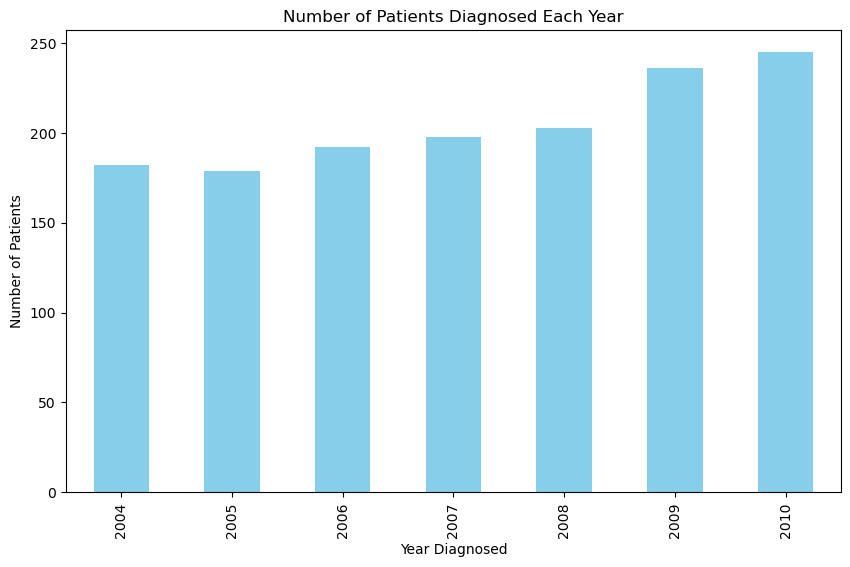

In [16]:
plt.figure(figsize=(10, 6))
df['Year Diagnosed'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Number of Patients Diagnosed Each Year')
plt.xlabel('Year Diagnosed')
plt.ylabel('Number of Patients')
plt.show()

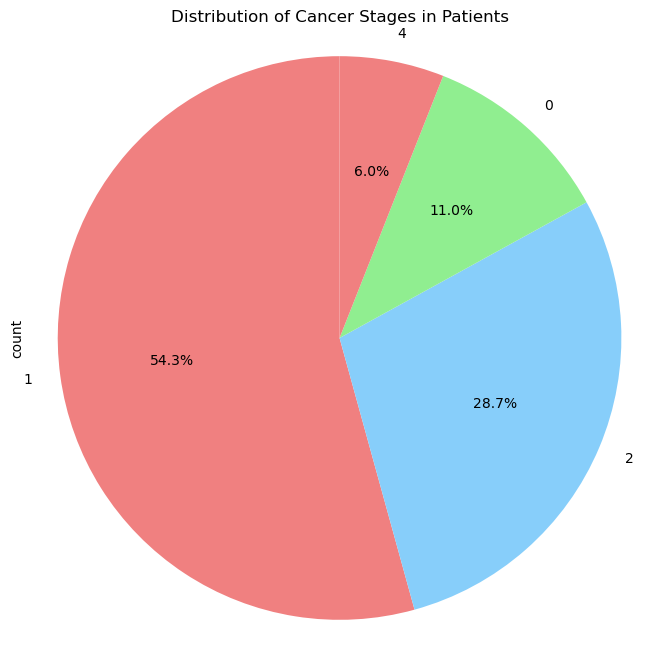

In [17]:


# Create a pie chart of the stages of cancer
plt.figure(figsize=(8, 8))
df['Stage'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue', 'lightgreen'])
plt.title('Distribution of Cancer Stages in Patients')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
plt.show()

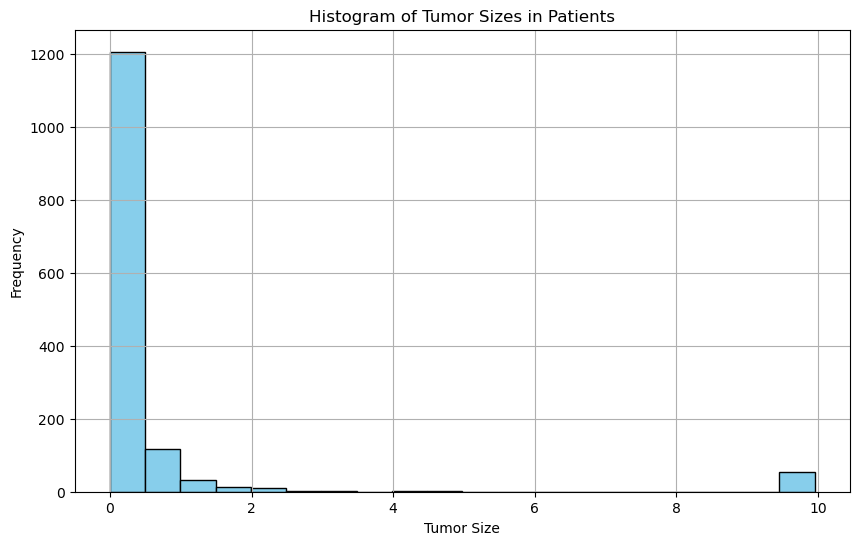

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(df['Tumor Size'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Tumor Sizes in Patients')
plt.xlabel('Tumor Size')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

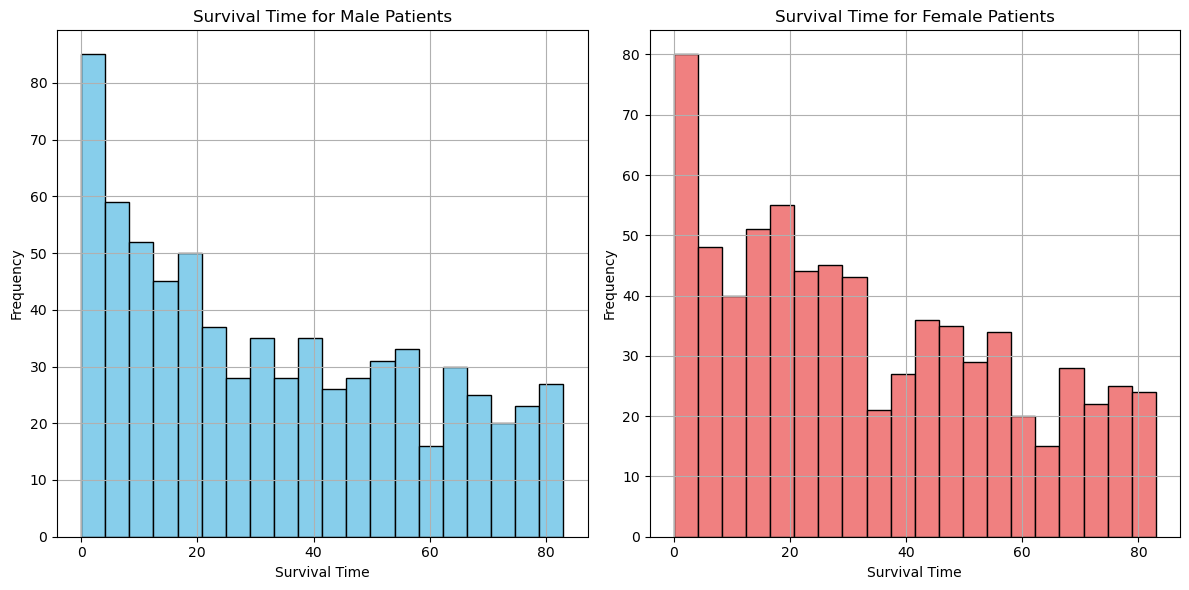

In [21]:


# Create histograms of survival time by gender
plt.figure(figsize=(12, 6))

# Histogram for male patients (Gender == 1)
plt.subplot(1, 2, 1)
plt.hist(df[df['Gender'] == 1]['Survival Time'], bins=20, color='skyblue', edgecolor='black')
plt.title('Survival Time for Male Patients')
plt.xlabel('Survival Time')
plt.ylabel('Frequency')
plt.grid(True)

# Histogram for female patients (Gender == 2)
plt.subplot(1, 2, 2)
plt.hist(df[df['Gender'] == 2]['Survival Time'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Survival Time for Female Patients')
plt.xlabel('Survival Time')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

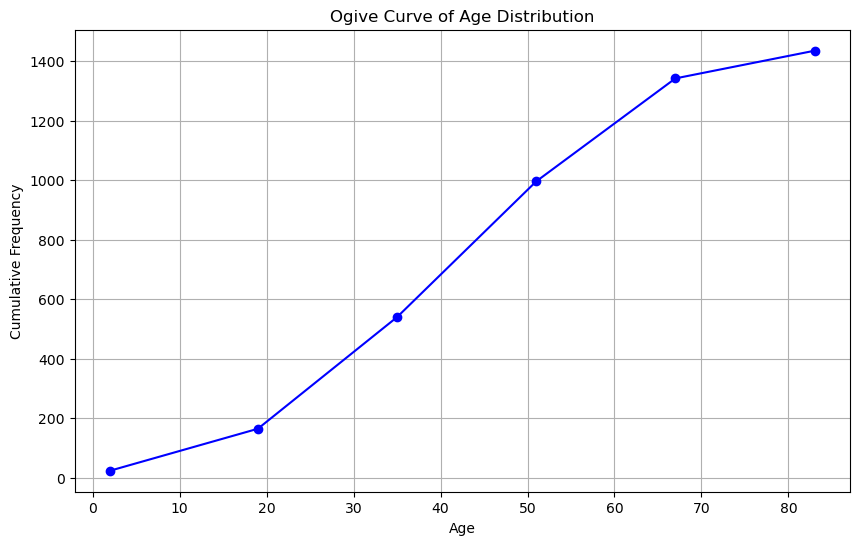


Number of patients diagnosed with cancer less than 50 years: 165


In [26]:


# Set the number of class intervals
num_intervals = 6

# Create class intervals for age
min_age = df['Age'].min()
max_age = df['Age'].max()
interval_width = (max_age - min_age) / num_intervals
class_intervals = [min_age + i * interval_width for i in range(num_intervals + 1)]

# Create a column in the dataframe to represent the age intervals
df['Age Interval'] = pd.cut(df['Age'], bins=class_intervals, include_lowest=True)

# Calculate cumulative frequency
ogive_data = df['Age Interval'].value_counts().sort_index().cumsum()

# Extract left edges of intervals
interval_left_edges = ogive_data.index.categories.left.astype(int)

# Create O-give curve
plt.figure(figsize=(10, 6))
plt.plot(interval_left_edges, ogive_data, marker='o', linestyle='-', color='blue')
plt.title('Ogive Curve of Age Distribution')
plt.xlabel('Age')
plt.ylabel('Cumulative Frequency')
plt.grid(True)
plt.show()

# Estimate the number of patients diagnosed with cancer less than 50 years
patients_less_than_50 = ogive_data[ogive_data.index.categories.right < 50].iloc[-1]
print("\nNumber of patients diagnosed with cancer less than 50 years:", patients_less_than_50)
